In [327]:
import torchvision
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
MNIST_PATH = '/'
mnist_train = torchvision.datasets.MNIST(str(MNIST_PATH), train=True, download=True)
mnist_test = torchvision.datasets.MNIST(str(MNIST_PATH), train=False, download=True)
train_images = mnist_train.train_data.numpy().astype(np.float)
train_labels = mnist_train.train_labels.numpy().astype(np.int)
test_images = mnist_test.test_data.numpy().astype(np.float)
test_labels = mnist_test.test_labels.numpy().astype(np.int)
train_images /= 256

# 4a

In [328]:
# SECTION USED FOR 4 A to get average image and classify them
img_size = int(train_images.shape[1] * train_images.shape[2])
unique = len(np.unique(train_labels))
average_images = np.zeros((unique, img_size))
numberTotal = np.zeros(unique)
total_img = train_images.shape[0]
for i in range(total_img):
    average_images[train_labels[i]] += (train_images[i].reshape(784,)) 
    numberTotal[train_labels[i]] += 1
for i in range(len(average_images)):
    average_images[i] /= numberTotal[i]
    
#Classification with average image
weight = average_images
curr_img = test_images / 255
curr_label = test_labels
X = curr_img.reshape(test_images.shape[0], 784)

In [329]:
#HELPER METHODS TO HELP WITH CLASSIFICATION
def forward(X, W, b):
    return np.add(np.dot(W, X),  b)
def softmax_func(y_hat):
    outputs = np.zeros(y_hat.shape)
    for i in range(y_hat.shape[1]):
        outputs[:,i]  = np.exp(y_hat[:,i])
        outputs[:,i] /= np.sum(outputs[:,i])
    return outputs
def predict(W, X, b):
    y_hat = forward(X, W, b)
    outputs = softmax_func(y_hat)
    return np.argmax(outputs, axis = 0)
def classification_accuracy(W, X, b, y):
    pred = predict(W, X, b)
    samples = y.shape[0]
    accuracy = 0
    for i in range(samples):
        if pred[i] == y[i]:
            accuracy = accuracy + 1
    return accuracy/samples
def output_images(weight):
    for i in range(weight.shape[0]):
        plt.imshow(weight[i].reshape(28,28), interpolation='nearest')
        plt.title('Image {0}'.format(i))
        plt.show()

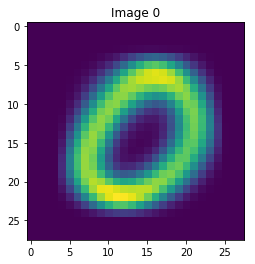

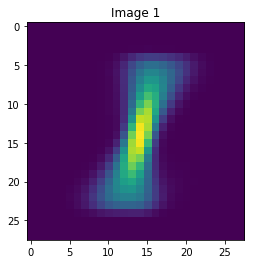

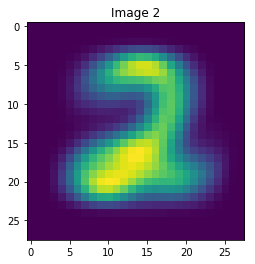

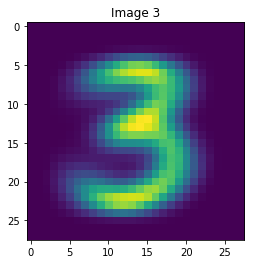

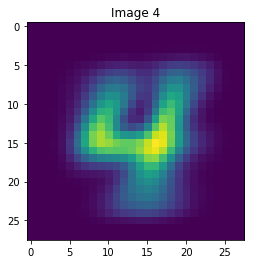

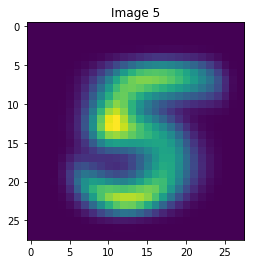

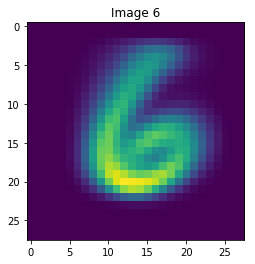

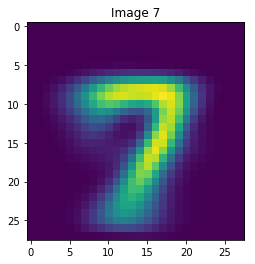

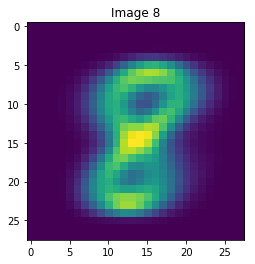

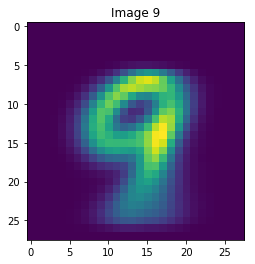

Accuracy: 63.1%


In [330]:
weight = average_images
acc = classification_accuracy(weight, np.transpose(X), np.zeros([unique, 1]), test_labels)
output_images(weight)
print('Accuracy: ' + str(acc*100) + '%')

# 4b

In [280]:
class LinearModel:
    def __init__(self, a, b): #set the iterations and the descent rate
        super().__init__() 
        self.epochs = a
        self.rate = b
    def forward(self, X, W, b):
        return np.add(np.dot(W, X),  b)
    def train(self, W, X, y):
        classes = np.unique(y).size
        b = np.zeros([classes, 1])
        one_hot_y = np.zeros([classes, y.shape[0]]) #one hot encoding of y
        losses = np.zeros(self.epochs)
        acc = np.zeros(self.epochs)
        
        for i in range(y.shape[0]):
            one_hot_y[int(y[i])][i] = 1
        
        for i in range(self.epochs):
            y_hat = self.forward(X, W, b)
            outputs = self.softmax_func(y_hat)
            w_grad, b_grad = self.grad(X, one_hot_y, b, outputs)
            W -= self.rate*w_grad
            b -= self.rate*b_grad
            losses[i] = self.loss(outputs, one_hot_y)
            acc[i] = self.classification_accuracy(W, X, b, y)
        self.plot(losses, acc)
        return W, b
            
    def softmax_func(self, y_hat):
        return np.exp(y_hat) / np.sum(np.exp(y_hat), axis=0)
        
    def predict(self, W, X, b):
        y_hat = self.forward(X, W, b)
        outputs = self.softmax_func(y_hat)
        return np.argmax(outputs, axis = 0)

    def loss(self, outputs, y):
        # Using KL divergence as loss, but entropy is 0 because the entropy of the true label is 0, thus we are only left
        # with the cross entropy calculated below
        return -(np.sum(y*np.log(outputs)))

    def grad(self, X, y, b, outputs): 
        # Use backpropagation dE/dw = dE/dy dy/dw, where E is the outputed cost, y is the prediction
        samples = X.shape[0]
        grad_e_y = -(y - outputs) # y = WX + b
        grad_y_w = X
        grad_e_w = (1/samples) * np.dot(grad_e_y, np.transpose(X)) #average across all samples
        grad_y_b = 1
        grad_e_b = (1/samples) * np.sum(grad_e_y, axis=1) #average across all samples
        return grad_e_w, grad_e_b.reshape(grad_e_b.shape[0], 1)
    
    def classification_accuracy(self, W, X, b, y):
        pred = self.predict(W, X, b)
        samples = y.shape[0]
        accuracy = 0
        for i in range(samples):
            if pred[i] == y[i]:
                accuracy = accuracy + 1
        return accuracy/samples
    
    def plot(self, loss, acc):
        
        plt.plot(acc)
        plt.title('Accuracy per epoch')
        plt.xlabel('Epochs')
        plt.ylabel('%Accuracy')
        plt.show()
        
        plt.plot(loss)
        plt.title('Loss per epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
        
        print('Accuracy: ' + str(acc[-1]*100) + '%')

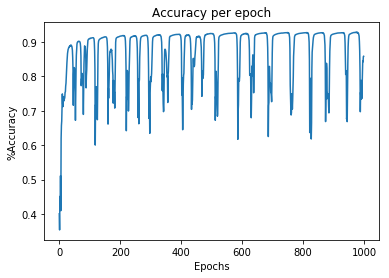

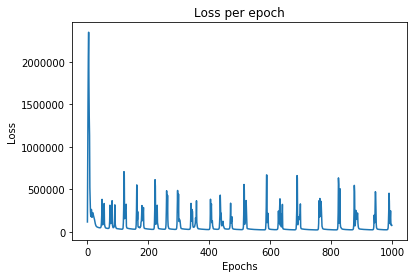

Accuracy: 85.83333333333333%


In [281]:
weight = average_images
X = train_images.reshape(train_images.shape[0], 784)
y = train_labels
b = LinearModel(1000, 0.1)
W, bias = b.train(weight, np.transpose(X), y)


In [293]:
X = test_images.reshape(test_images.shape[0], 784)/256
acc = b.classification_accuracy(W, np.transpose(X), bias, test_labels)

print('Accuracy: ' + str(acc*100) + '%')

Accuracy: 85.48%


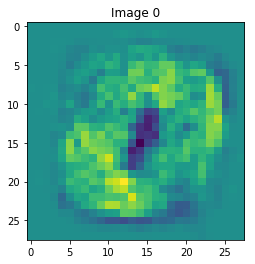

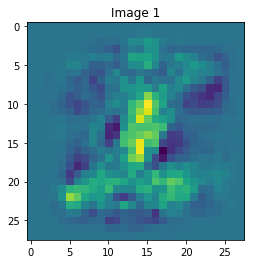

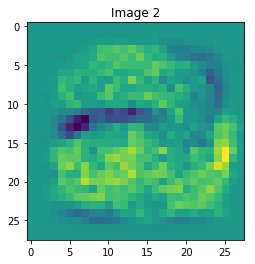

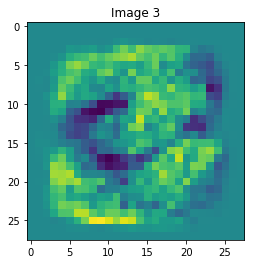

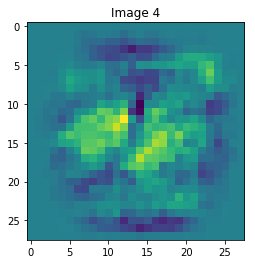

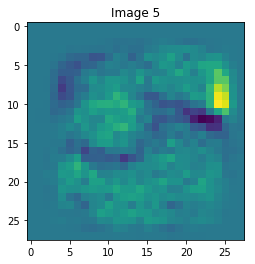

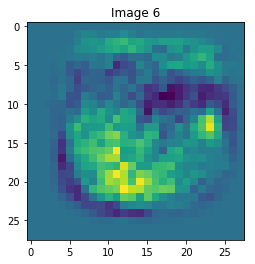

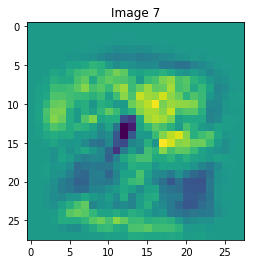

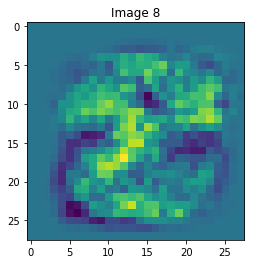

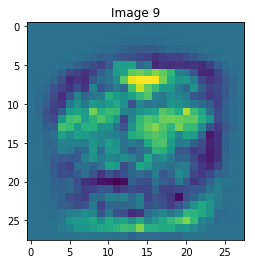

In [294]:
output_images(W) #output image from weights

# 4C

In [336]:
#Generating images by averaging a few images of each number from the test set
gen_images = np.zeros((15, 784)) #15 images to generate
gen_labels = np.zeros(15)
vectorize_test = test_images.reshape(test_images.shape[0], 784)
#     average_images[train_labels[i]] += (train_images[i].reshape(784,)) 
#     numberTotal[train_labels[i]] += 1
for i in range(15):
    gen_labels[i] = i%10
for j in range(10):
    i_image = vectorize_test[test_labels == j]
    gen_images[j] = ((i_image[0] + i_image[1] + i_image[15] + i_image[64])/4)/255
for k in range(10, 15):
    i_image = vectorize_test[test_labels == k%10]
    gen_images[k] = ((i_image[0] + i_image[1] + i_image[2] + i_image[3] + i_image[30] + i_image[50])/6)/255


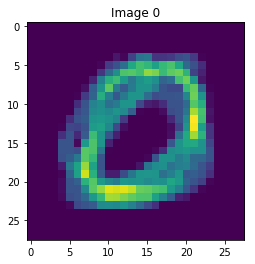

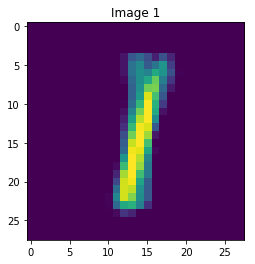

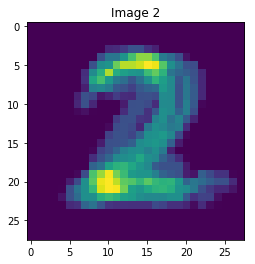

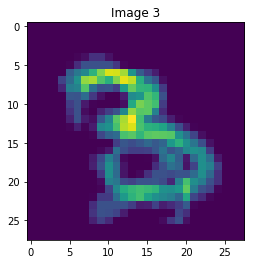

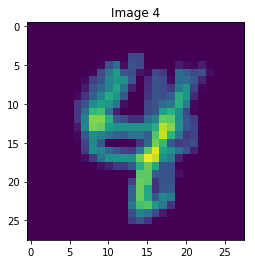

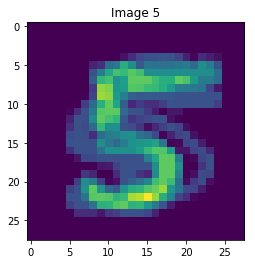

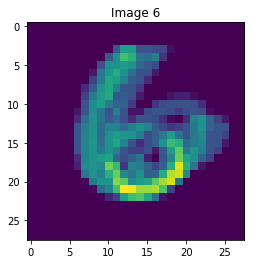

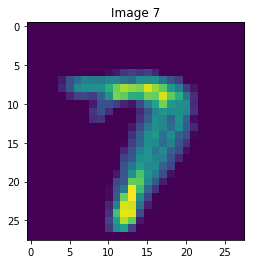

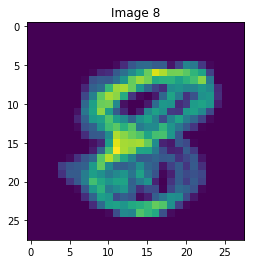

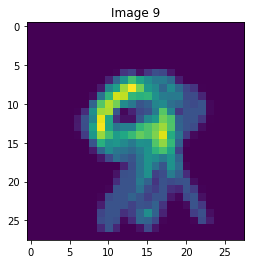

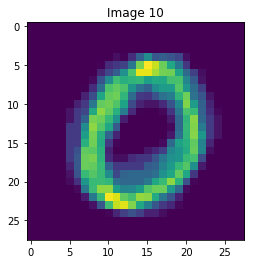

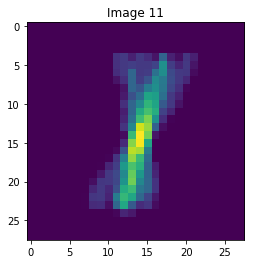

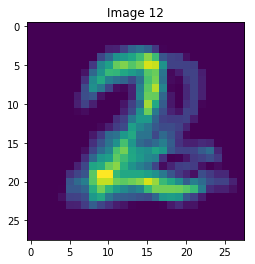

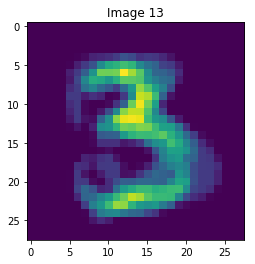

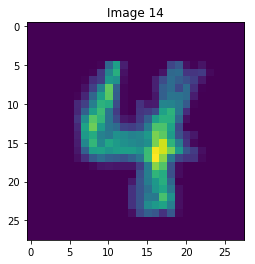

In [337]:
output_images(gen_images)

In [338]:
# Training on the weights outputted by the model
acc = b.classification_accuracy(W, np.transpose(gen_images), bias, gen_labels)

print('Accuracy: ' + str(acc*100) + '%')

Accuracy: 86.66666666666667%


In [340]:
# Need to recompute weight from 4a, run that block again to get the weight and then run this block
weight = average_images
acc = classification_accuracy(weight, np.transpose(gen_images), np.zeros([unique, 1]), gen_labels)
print('Accuracy: ' + str(acc*100) + '%')

Accuracy: 80.0%


The trained model does better with generalization vs the average weight model, which is highly biased.